<a href="https://colab.research.google.com/github/Elmir22/Data-science/blob/main/linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
plt.rc("font",size=14)
plt.rc('axes',labelsize = 14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize =10)
plt.rc('ytick',labelsize=10)

In [2]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

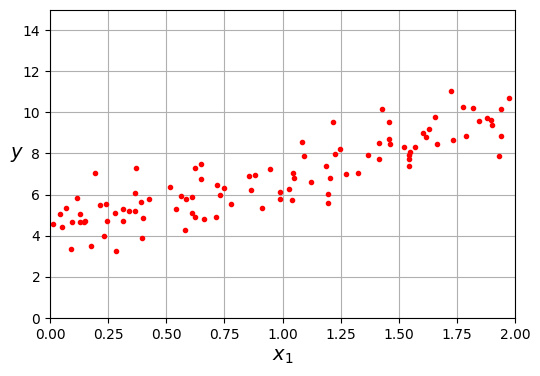

In [3]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "r.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid();

In [4]:
matrix_a = np.array([[1,2],[3,4]])
matrix_b = np.array([[5,6],[7,8]])

result= matrix_a @ matrix_b
result1 = np.dot(matrix_a,matrix_b)

print("matrix_1")
print(matrix_a)
print('matrix_b')
print(matrix_b)
print('@ istifade etmekle ')
print(result)
print('np.dot dan istifade etmekle')
print(result1)

matrix_1
[[1 2]
 [3 4]]
matrix_b
[[5 6]
 [7 8]]
@ istifade etmekle 
[[19 22]
 [43 50]]
np.dot dan istifade etmekle
[[19 22]
 [43 50]]


In [5]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T@X_b) @ X_b.T @y

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

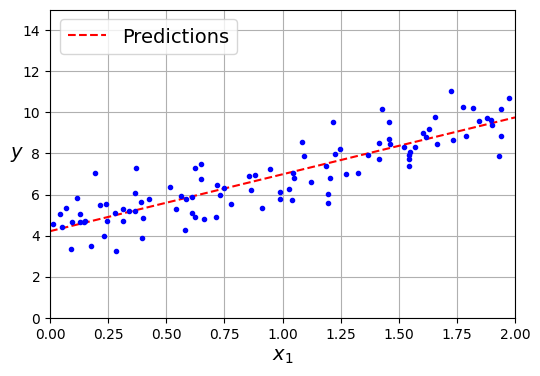

In [8]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict, "r--", label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show();

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

#Gradient Descent

In [12]:
eta = 0.1
n_epochs = 1000
X_new_b
m= len(X_b)
np.random.seed(42)
theta =np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients = 1/m*2*X_b.T @(X_b @ theta - y)
  theta = theta - eta*gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

#Stochastic Gradient Descent

In [14]:
np.random.seed(42)
eta =0.1
m= len(X_b)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index +1 ]
    yi = y[random_index : random_index + 1]
    gradients = 2*xi.T@(xi@theta-yi)
    theta = theta - eta* gradients
#gradients = 1/m*2*X_b.T @(X_b @ theta - y)
#theta = theta - eta*gradients

In [15]:
theta

array([[4.17686315],
       [2.85986577]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter= 1000,tol=1e-5, penalty=None, eta0= 0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#Mini-batch gradient descent

In [18]:
from math import ceil
n_epochs = 50
eta = 0.1
minibatch_size = 20
n_batches_per_epoch = ceil(m/minibatch_size)

np.random.seed(42)
thetan=np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx = iteration*minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx : idx + minibatch_size]
    gradients = 2/minibatch_size*xi.T@(xi@theta-yi)
    theta = theta - eta*gradients

In [19]:
theta

array([[4.22034332],
       [2.77035765]])

#Polynomial Regression

In [20]:
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 + X + 2 + np.random.randn(m,1)

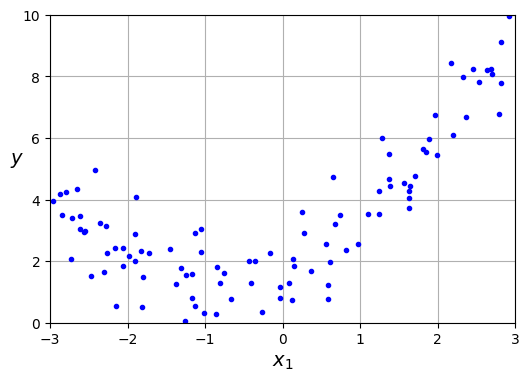

In [21]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [23]:
X_new = np.array([[-3],[3]])
X_preds=lin_reg.predict(X_new)
X_preds

array([[1.03315352],
       [6.09487734]])

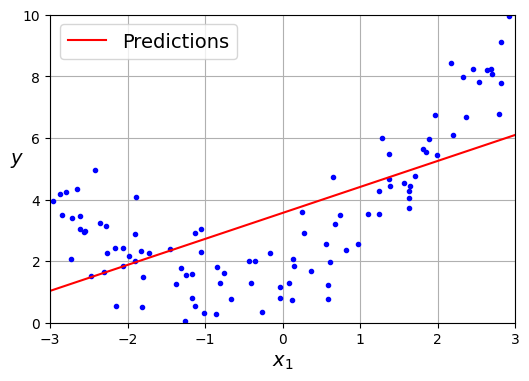

In [24]:
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.plot(X_new, X_preds, "r-",label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [26]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [27]:
from sklearn.pipeline import make_pipeline
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

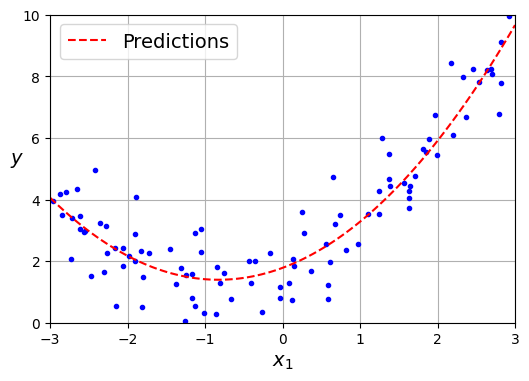

In [28]:
X_pred = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_pred)
plt.figure(figsize=(6,4))
plt.plot(X,y, "b.")
plt.plot(X_pred, y_pred, "r--",label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

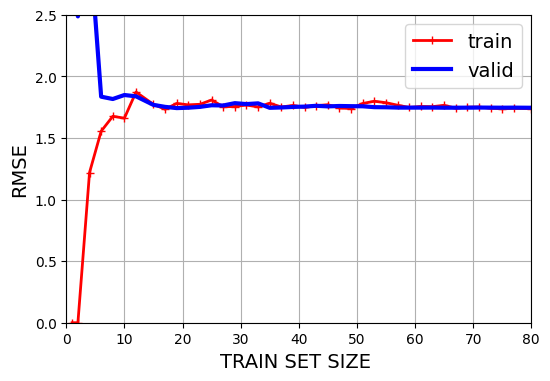

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("TRAIN SET SIZE ")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])

plt.show()

In [31]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree= 10, include_bias=False),
    LinearRegression())

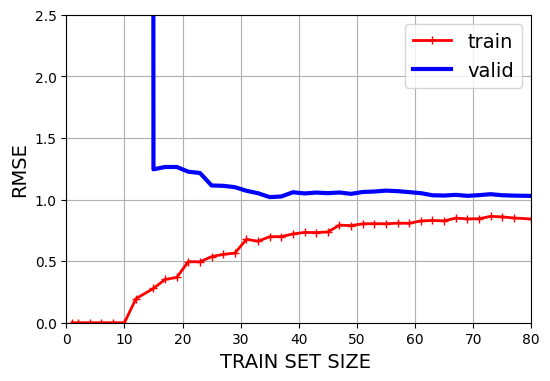

In [32]:

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("TRAIN SET SIZE ")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])

plt.show()

#Regularized Linear Models


#Ridge Regression



In [33]:
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y= 1+0.5*X+ np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

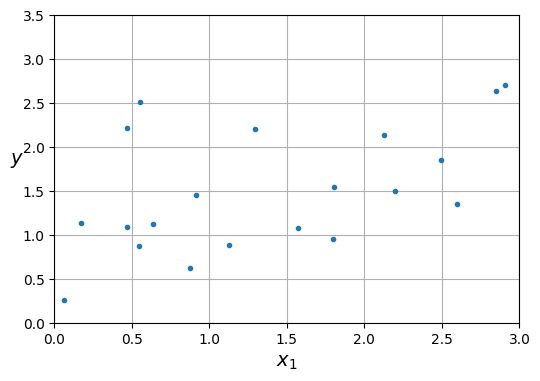

In [35]:
plt.figure(figsize=(6,4))
plt.plot(X,y,".")
plt.xlabel("$x_1$")
plt.ylabel("$y$ ", rotation=0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [43]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
ridge_reg = Ridge(alpha =0.1 , solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

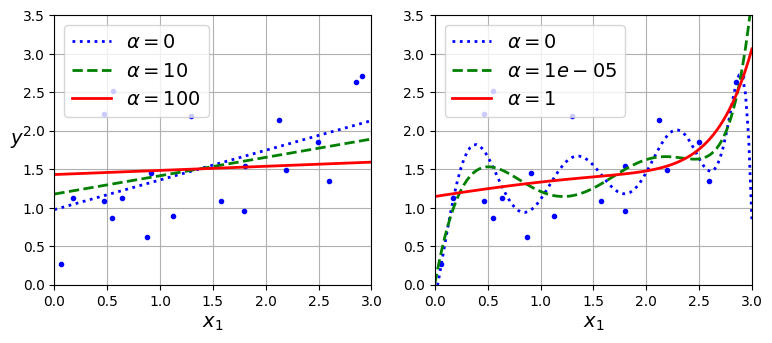

In [44]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
  plt.plot(X,y,"b.", linewidth=3)
  for alpha, style in zip(alphas, ("b:", "g--", "r-")):
    if alpha>0:
      model=model_class(alpha, **model_kwargs)
    else:
      model=LinearRegression()
    if polynomial:
      model = make_pipeline(
          PolynomialFeatures(degree=10, include_bias=False),
          StandardScaler(),
          model)
    model.fit(X,y)
    y_new_regul = model.predict(X_new)
    plt.plot(X_new, y_new_regul,style, linewidth=2,
             label=fr"$\alpha = {alpha}$")

  plt.legend(loc="upper left")
  plt.xlabel("$x_1$")
  plt.axis([0,3,0,3.5])
  plt.grid()

plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt_model(Ridge, polynomial=False, alphas=(0,10,100),random_state=42)
plt.ylabel("$y$ ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0,10**-5,1), random_state=42)
plt.show()